In [1]:
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt
import yaml

In [2]:
for _, dir, files in os.walk('.'):
    break

In [3]:
dir = [d for d in dir if 'output_' in d]
conf_file = [d for d in files if 'yaml' in d and 'gen' not in d][0]

In [4]:
with open(conf_file, "r") as f:
    config = yaml.safe_load(f)

In [5]:
dir_files = {}
name_files = set()
for d in dir:
    dir_files[d] = {}
    dir_files[d]['files'] = []
    for _, cd, fl in os.walk(f'./{d}'):
        break
    print(fl)
    conf_file = [d for d in fl if 'log' in d ][0]
    with open(f"./{d}/{conf_file}", "r") as f:
        config = yaml.safe_load(f)
    dir_files[d]['config'] = config
    if 'inference' in cd:
        for _, _, files in os.walk(f'./{d}/inference'):
            break
        dir_files[d]['files'] += files
        name_files = name_files.union(set(files))

['gen_config_output_2504151233.yaml', 'log_train.log', 'config_2504151233.yaml']
['gen_config_output_2504151206.yaml', 'log_train.log', 'config_2504151206.yaml']


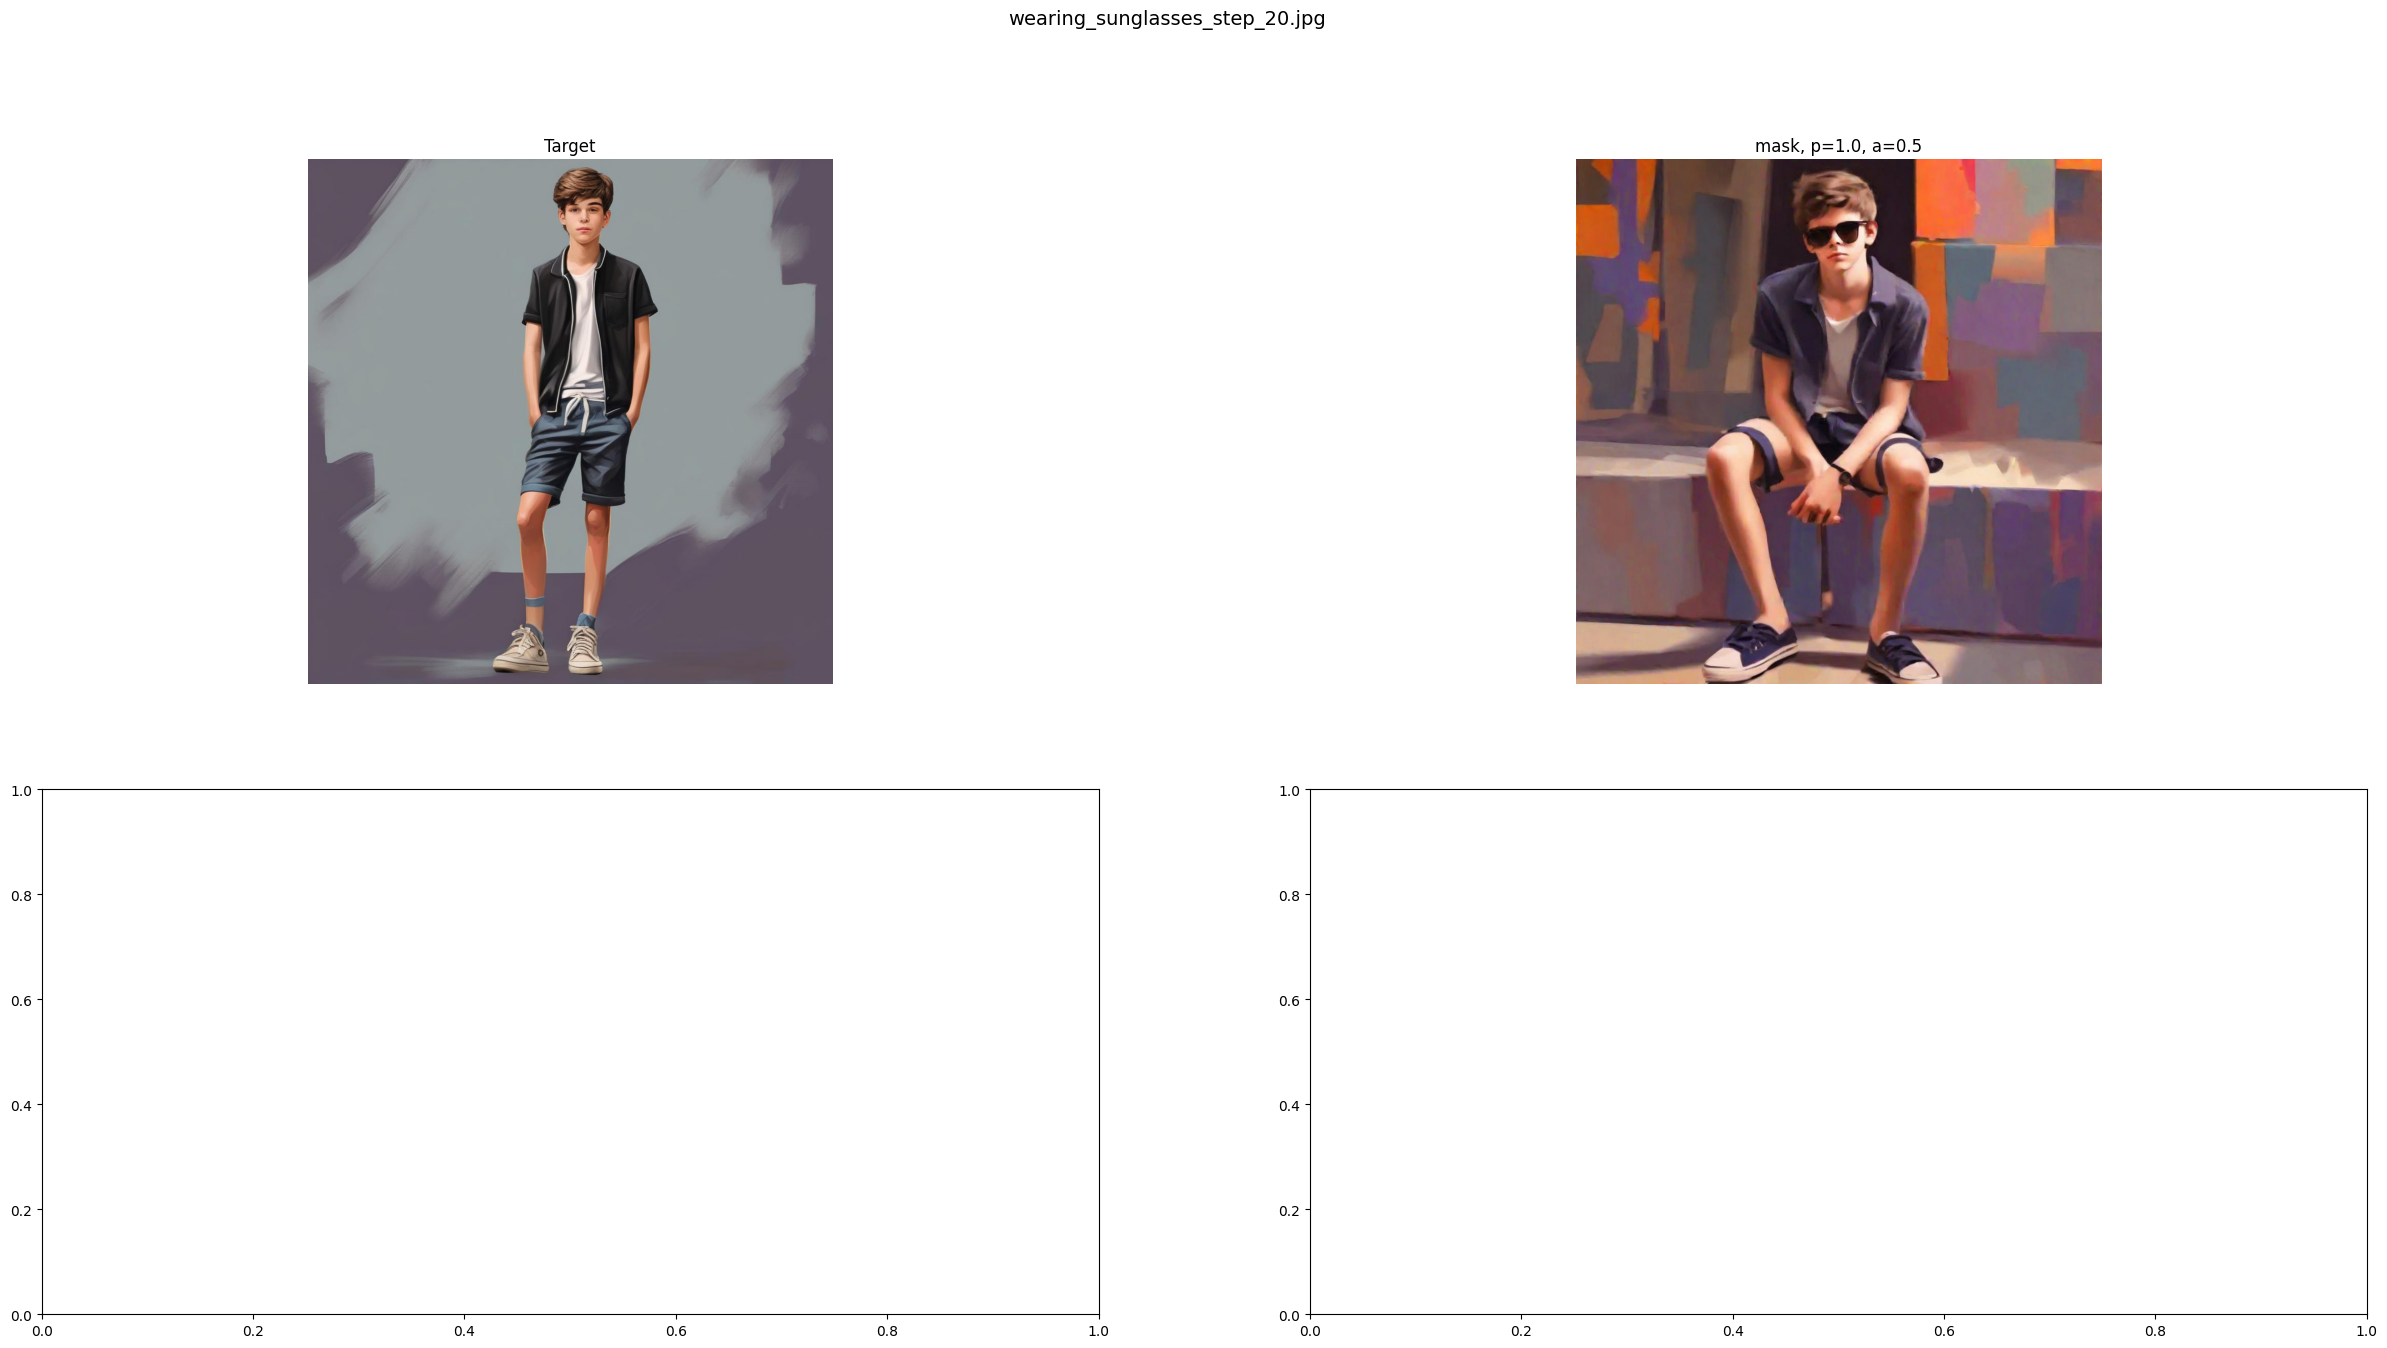

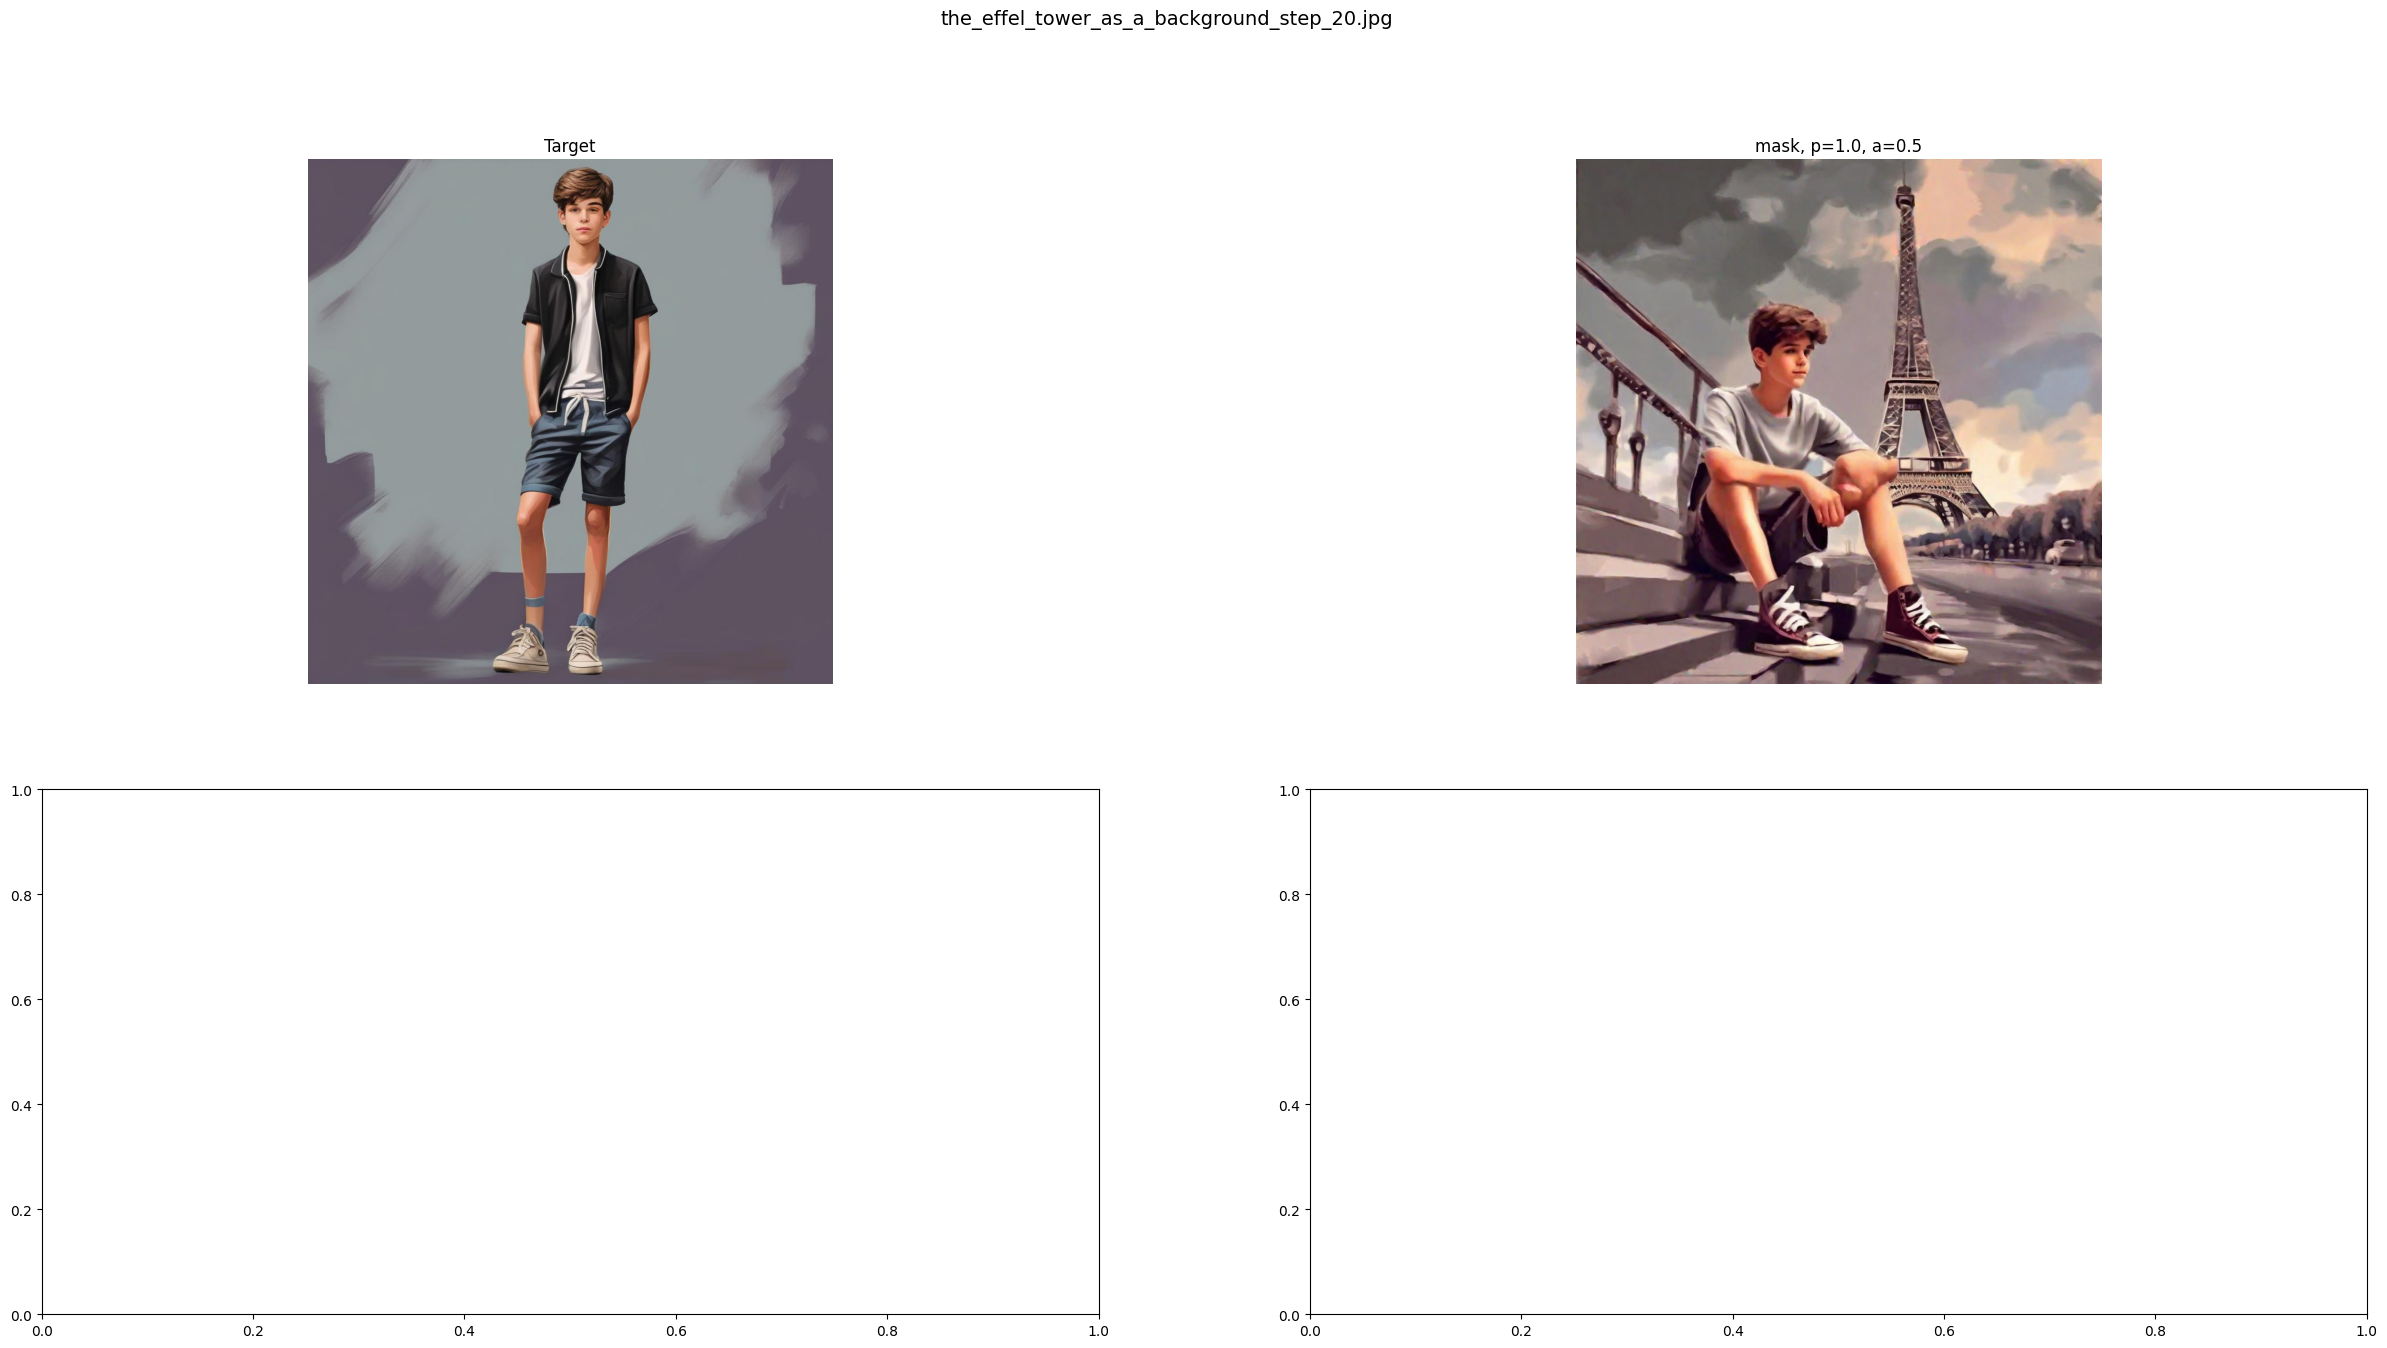

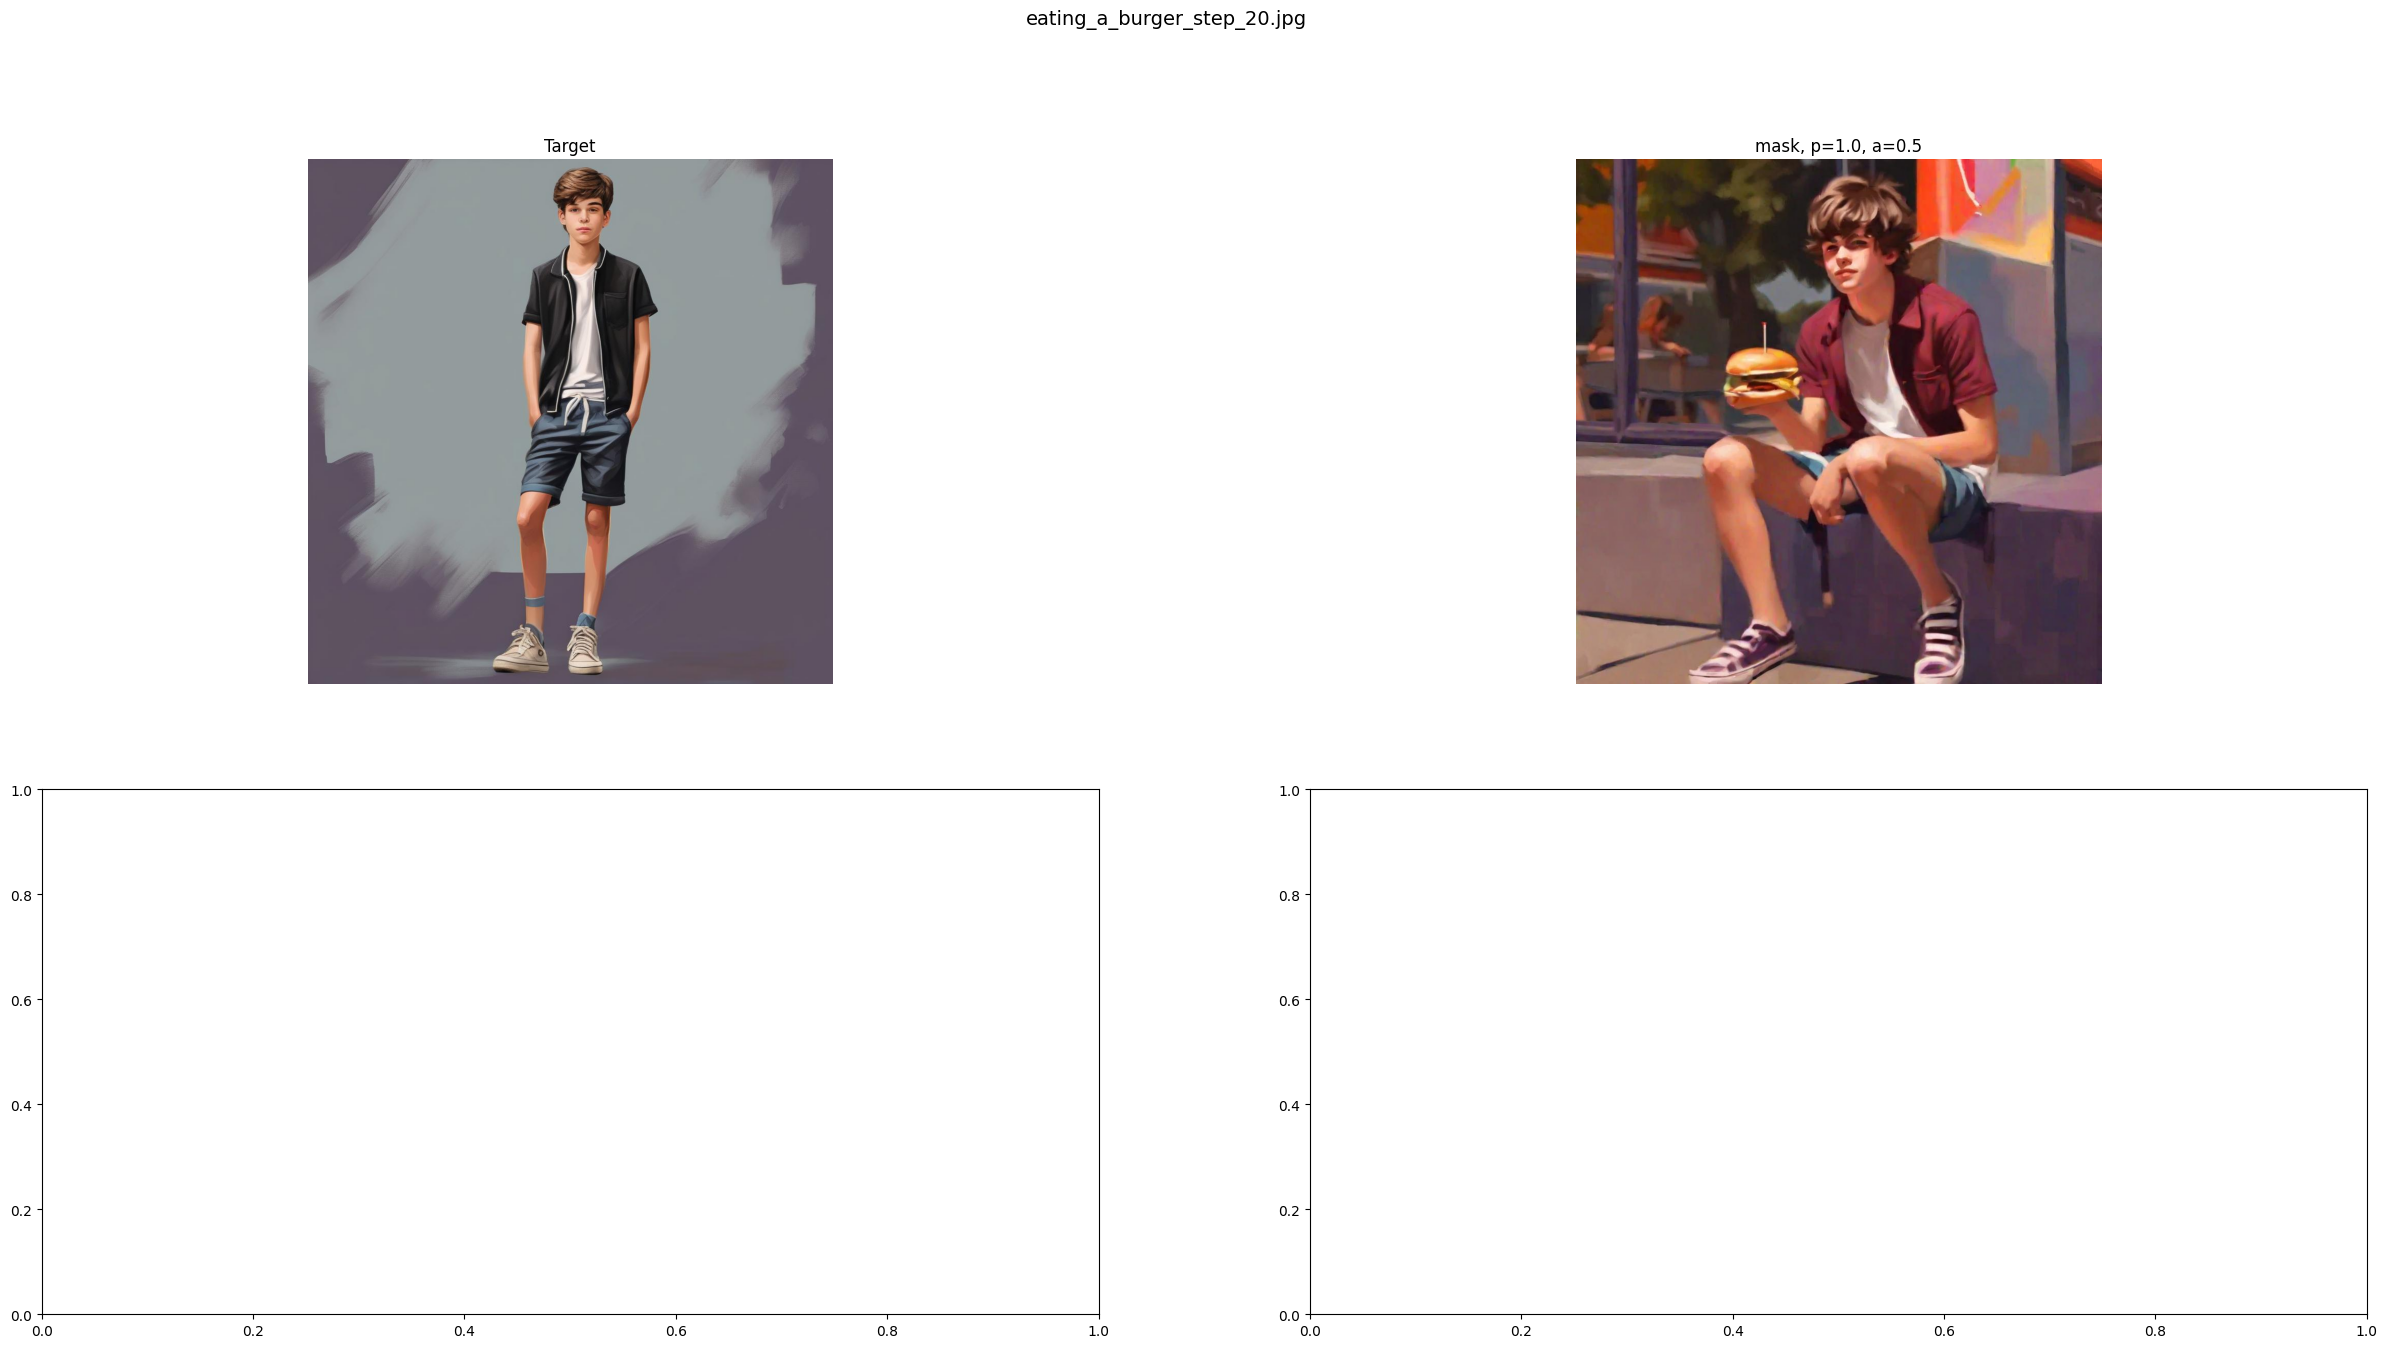

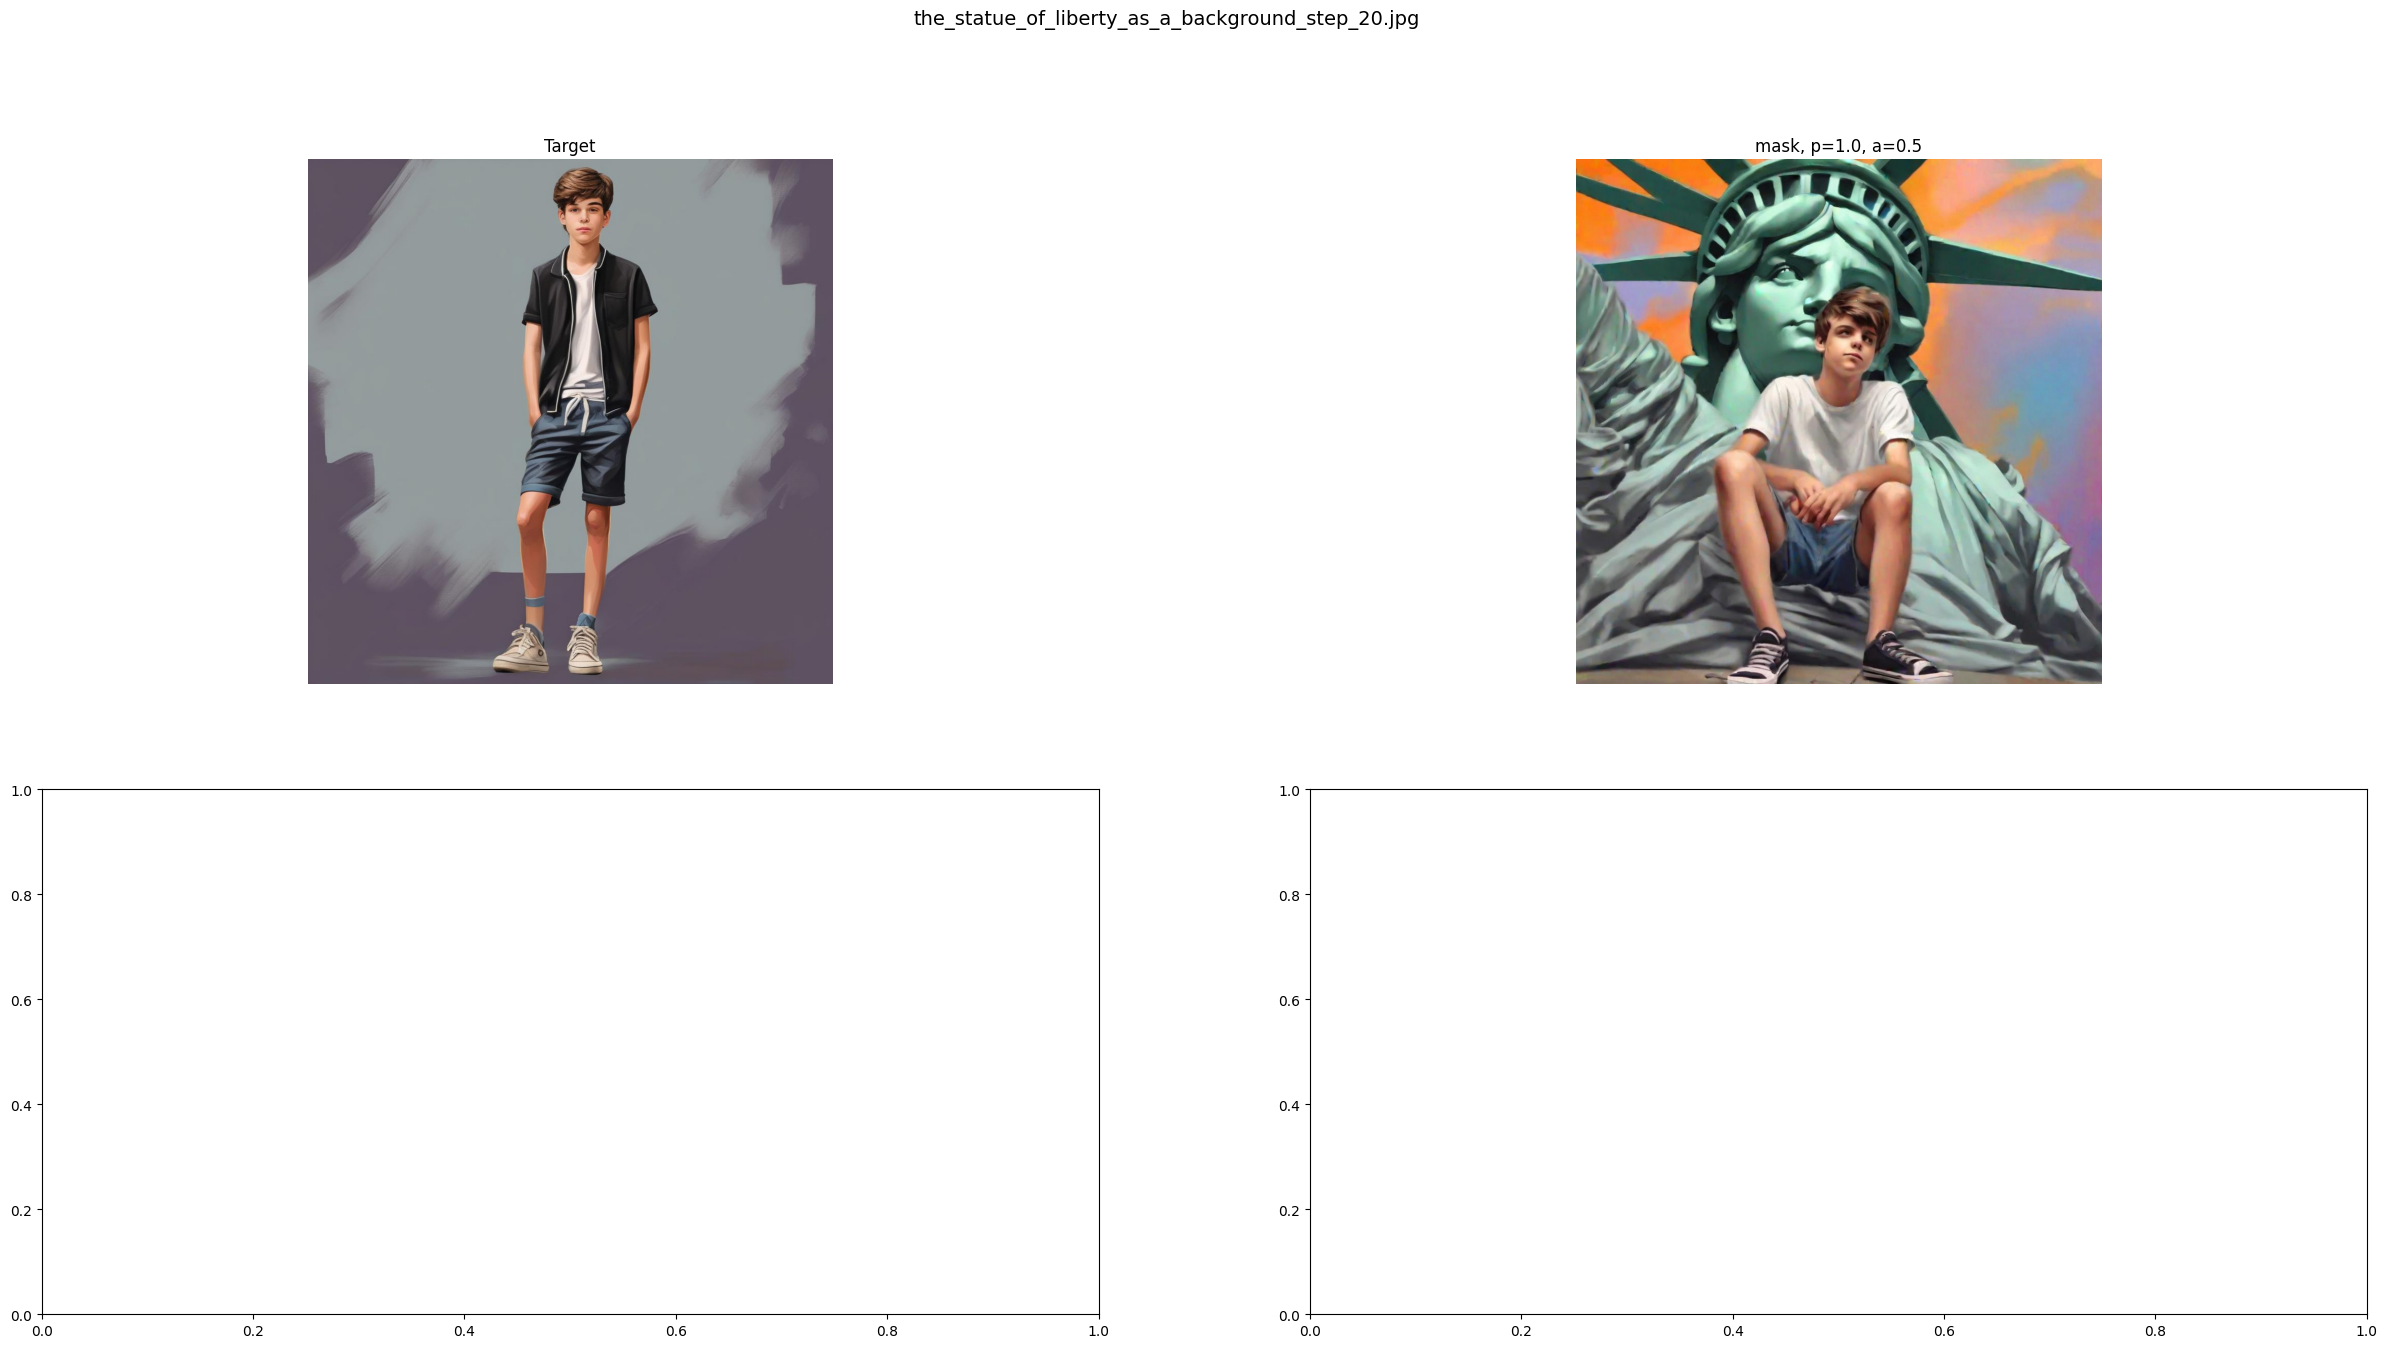

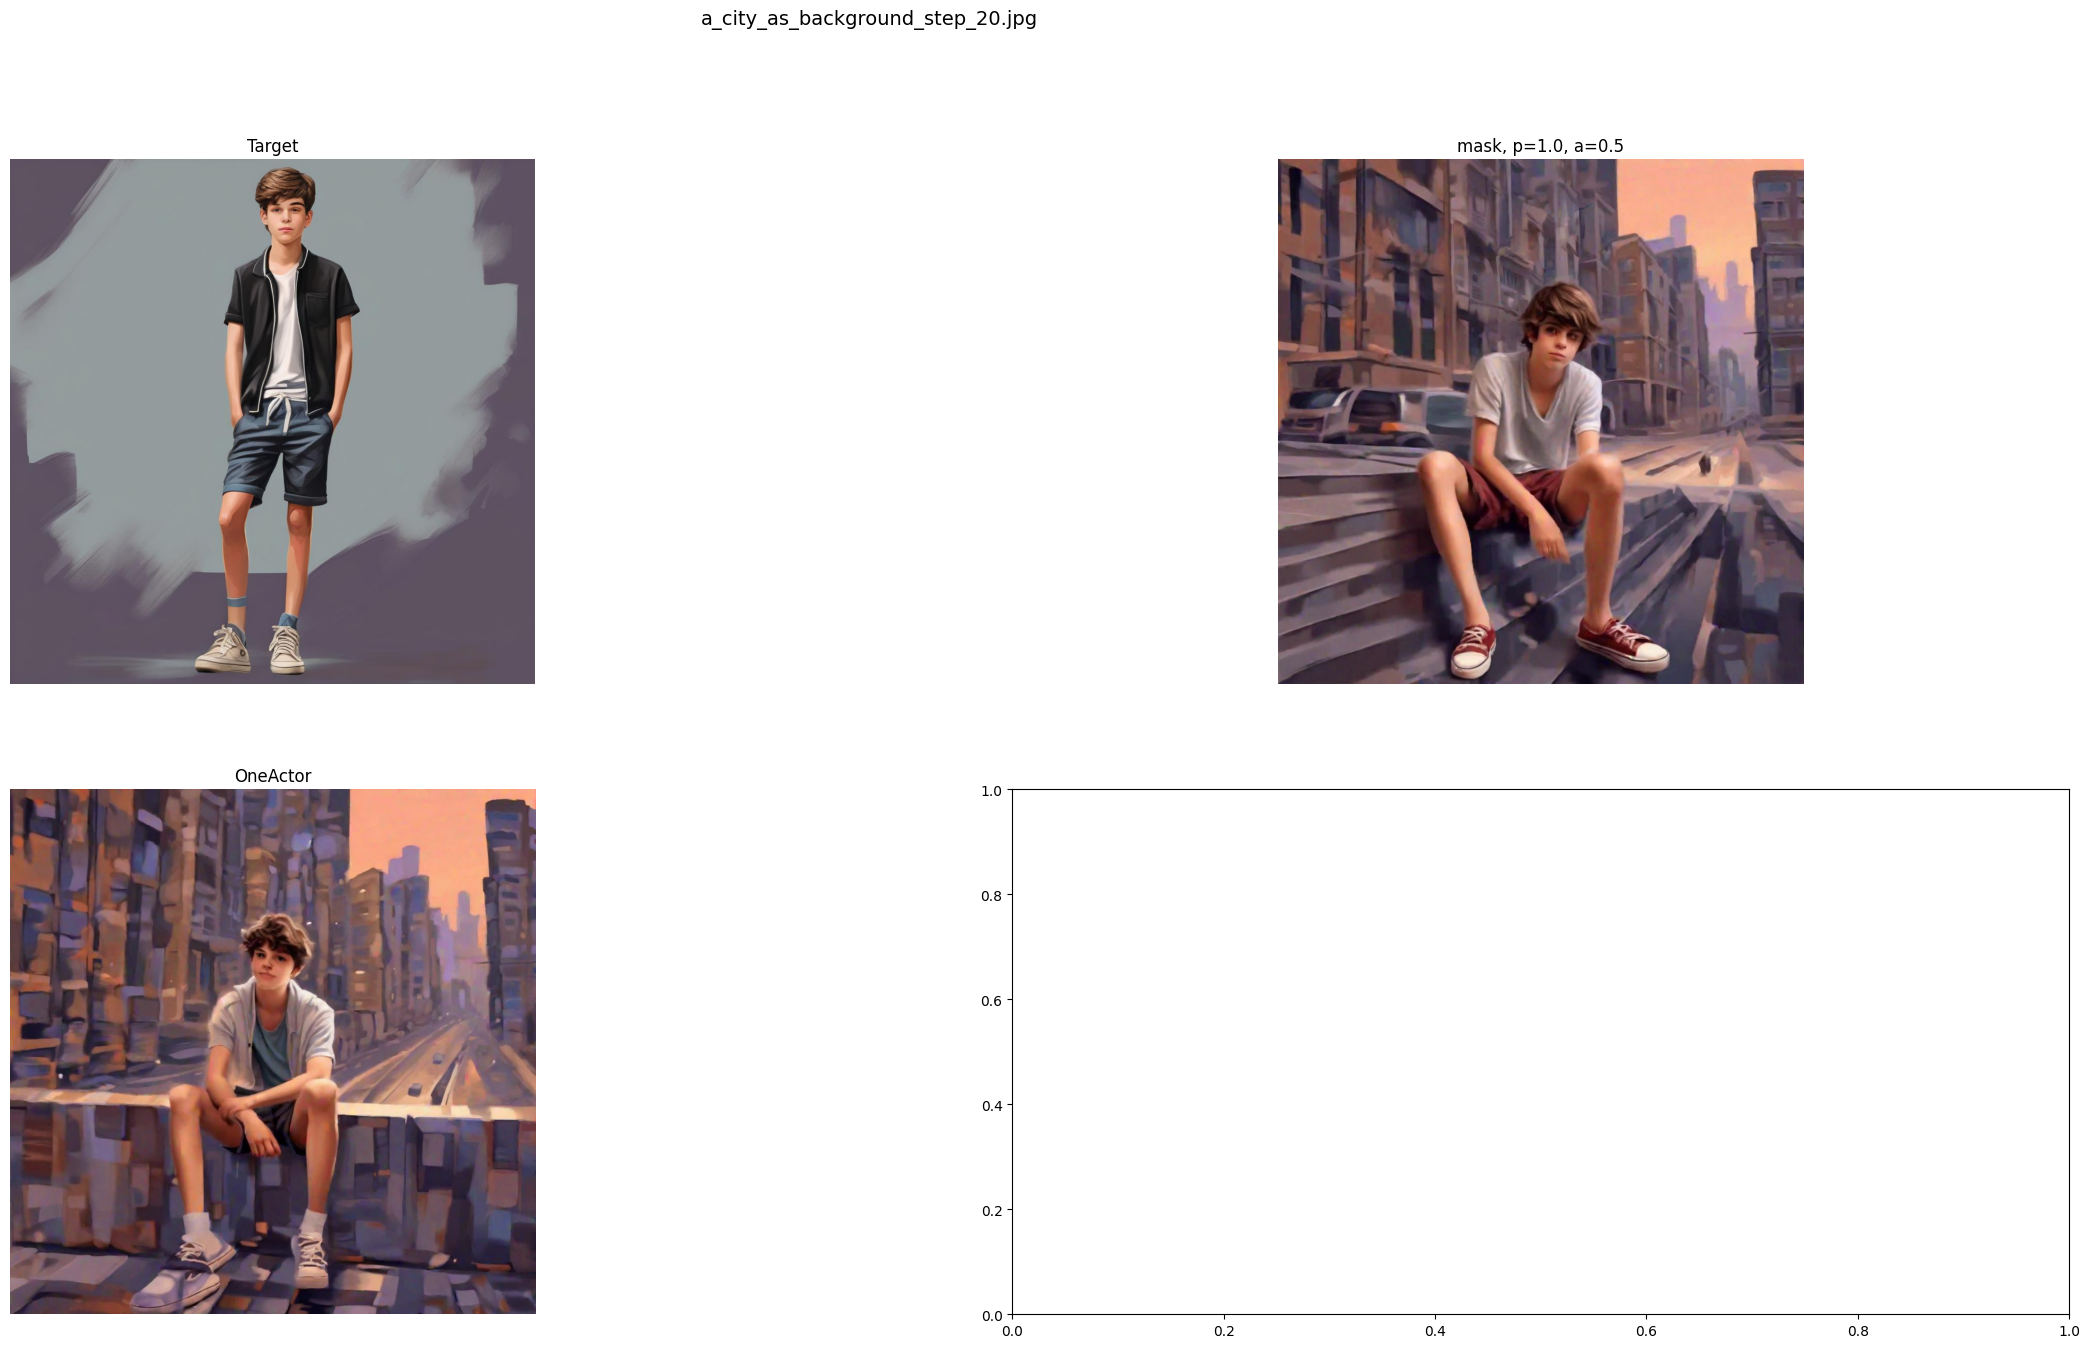

In [6]:
import os
os.makedirs(f"./reconciliation", exist_ok=True)

# 100, 80, 40, 20
for n, file_name in enumerate(name_files):
    if '20' not in file_name:
        continue
    f, axarr = plt.subplots(2, (len(dir) + 2) // 2, figsize=(30, 15))
    axarr[0][0].imshow(Image.open('target.jpg'))
    axarr[0][0].set_title("Target")
    axarr[0][0].axis('off')
    for m, d in enumerate(dir):
        if file_name in dir_files[d]['files']:
            axarr[(m+1) // ((len(dir) + 2) // 2)][(m+1) % ((len(dir) + 2) // 2)].imshow(Image.open(f'./{d}/inference/{file_name}'))
            if dir_files[d]['config']['use_mask']:
                title = f"mask, p={dir_files[d]['config']['mask_power']}, a={dir_files[d]['config']['mask_alpha']}"
            elif dir_files[d]['config']['use_zone']:
                title = f"zone, a={dir_files[d]['config']['zone_alpha']}"
            else:
                title="OneActor"
            axarr[(m+1) // ((len(dir) + 2) // 2)][(m+1) % ((len(dir) + 2) // 2)].set_title(title)
            axarr[(m+1) // ((len(dir) + 2) // 2)][(m+1) % ((len(dir) + 2) // 2)].axis('off')
    f.suptitle(f'{file_name}', fontsize=14)
    plt.show()
    f.savefig(f'./reconciliation/rec_{file_name}')       